# Basic Statistics

### SWBATS

* Use Numpy and Pandas to compute summary statistics for measures of center and spread
* Apply summary statistics like mean and standard deviation to transformed data and compare results.
* Use graphical summaries (Histograms and Boxplots) to describe data spread and centre. 
* Describe the idea and rationale for inferential statistics.

First we need the necessary libraries

In [29]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np 
import pandas as pd

For this lab, we shall use a dataset covering temperature and weather values in Boulder city during the month of July 2017. The dataset has been taken from [National Oceanic and Atmospheric Administration's Climate website](https://www.climate.gov/). You can download other relevant climate related datsets [HERE](https://www.climate.gov/maps-data/datasets).

The data is stored in a .csv file called boulder_weather.csv. The dataset has been cleaned up so you can focus more on statistics, rather than data wrangling techniques.

Let's load this dataset into a pandas dataframe 

In [2]:
df = pd.read_csv('boulder_weather.csv')

Take a look at the first 10 rows of the DataFrame.

In [4]:
df.head(10)

,STATION,NAME,DATE,PRCP,TMAX,TMIN
0,USW00094075,"BOULDER 14 W, CO US",2017-07-01,0.00,68.0,31.0
1,USW00094075,"BOULDER 14 W, CO US",2017-07-02,0.00,73.0,35.0
2,USW00094075,"BOULDER 14 W, CO US",2017-07-03,0.00,68.0,46.0
3,USW00094075,"BOULDER 14 W, CO US",2017-07-04,0.05,68.0,43.0
4,USW00094075,"BOULDER 14 W, CO US",2017-07-05,0.01,73.0,40.0
5,USW00094075,"BOULDER 14 W, CO US",2017-07-06,0.00,76.0,48.0
6,USW00094075,"BOULDER 14 W, CO US",2017-07-07,0.02,74.0,43.0
7,USW00094075,"BOULDER 14 W, CO US",2017-07-08,0.00,65.0,44.0
8,USW00094075,"BOULDER 14 W, CO US",2017-07-09,0.01,73.0,39.0
9,USW00094075,"BOULDER 14 W, CO US",2017-07-10,0.01,75.0,44.0


Following is a description of columns you see in the dataset:

* STATION: The unique identification code for each weather station
* NAME: The location / name of the weather station
* DATE: The date of the observation
* PRCP: The precipitation (in inches)
* TMAX: The daily maximum temperature (in Fahrenheit)
* TMIN: The daily minimum temperature (in Fahrenheit)

From above we can see that the data has been collected from a number of weather stations (the NAME column). Use python's `set()` method identify a list of included weather stations. 

In [7]:
stations = list(set(df.NAME))
stations

['RALSTON RESERVOIR, CO US',
 'BOULDER 14 W, CO US',
 'BOULDER, CO US',
 'NIWOT, CO US',
 'GROSS RESERVOIR, CO US',
 'NORTHGLENN, CO US',
 'SUGARLOAF COLORADO, CO US']

### `pandas.DataFrame.loc()` function

Pandas `.loc()` function allows to access groups of rows and/or columns in a dataframe. This is a handy function for selecting subset(s) from a bigger datasets (think an SQL SELECT statement with a WHERE clause). More details can be viewed [HERE](https://medium.com/dunder-data/selecting-subsets-of-data-in-pandas-6fcd0170be9c). We shall use this function below to select data. Use this function with syntax given below 
> DataFrame.loc[CONDITION]

Using .loc() can help data scientists to avoid writing complex nested foor loops for iterating through a collection of information. It allows you to specify rows/columns with and required transformation gets applied applied to every element in the selection. We use this for a few exercises below. 

As we can see above that we have 7 unique weather stations in our dataset. Let's Extract the rows of the DataFrame concerned with the "RALSTON RESERVOIR" weather station. Store this data in a new DataFrame called `Ralston` and view first 5 rows of the data. 

In [9]:
Ralston = df.loc[df.NAME == 'RALSTON RESERVOIR, CO US']
Ralston.head()

,STATION,NAME,DATE,PRCP,TMAX,TMIN
154,USC00056816,"RALSTON RESERVOIR, CO US",2017-07-02,0.0,84.0,61.0
155,USC00056816,"RALSTON RESERVOIR, CO US",2017-07-03,0.0,87.0,58.0
156,USC00056816,"RALSTON RESERVOIR, CO US",2017-07-04,0.0,87.0,59.0
157,USC00056816,"RALSTON RESERVOIR, CO US",2017-07-05,0.0,91.0,61.0
158,USC00056816,"RALSTON RESERVOIR, CO US",2017-07-06,0.0,94.0,62.0


### `pd.mean()`

Pandas has a built in functions to compute the mean of a dataset or a series -  `pd.mean( )`. All of these functions can be called either on a single Pandas Series (i.e. a column of a DataFrame) or on an entire DataFrame at one time.

Let's apply the `pd.mean()` function on the Ralston dataframe. 

In [10]:
pd.DataFrame.mean(Ralston)

PRCP     0.042000
TMAX    86.533333
TMIN    61.166667
dtype: float64

Text(0.5,0,'Degrees F')

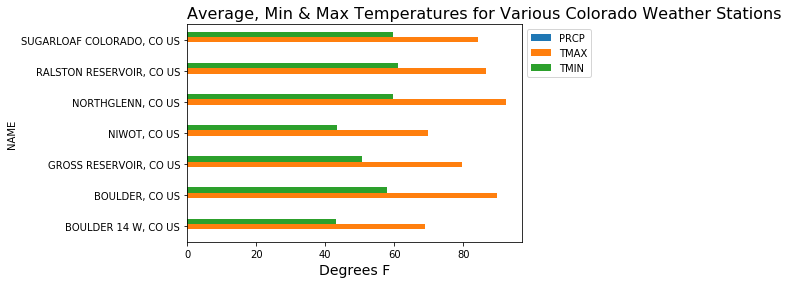

In [34]:
df.groupby('NAME').mean().plot(kind='barh')
plt.legend(bbox_to_anchor=(1,1))
plt.title('Average, Min & Max Temperatures for Various Colorado Weather Stations', fontsize=16, loc='left')
plt.xlabel('Degrees F', fontsize=14)

Calculate the sample mean of the "maximum daily temperature" ONLY at Ralston weather station. 

In [11]:
pd.DataFrame.mean(Ralston.TMAX)

86.53333333333333

We can see that applying the `pd.mean()` function on complete dataset calculates the mean for every column found in the set. We can however, selectively identify column(s) as we saw above for mean calculation. 

### Other functions for summary statistics

Following is the list of functions that we can use to calculate other summary statistics.

![](math.svg)

Use above functions with Ralston dataframe and print 5-point summary statistics, along with mean and standard deviation.

Round off and print the results in a nice manner

In [35]:
tm = Ralston['TMAX']

mean = round(tm.mean(), 2)
std = round(tm.std(), 2)
mini = round(tm.min(), 2)
Q1 = round(tm.quantile(.25), 2)
median = round(tm.median(), 2)
Q2 = round(tm.quantile(.75), 2)
maxi = round(tm.max(), 2)

print("""
Mean: {}
\n
Standard Deviation: {}
\n\n
\t\t MIN \t Q1 \t MEDIAN \t Q2 \t MAX
\n
UGH UGH UGH
"""
      .format(mean, std))


Mean: 86.53


Standard Deviation: 5.89



		 MIN 	 Q1 	 MEDIAN 	 Q2 	 MAX


UGH UGH UGH



In [1]:
# Expected output

# Mean: 86.53
# Standard deviation: 5.89

#                   MIN      Q1       MEDIAN    Q2       MAX
# 5-Number Summary: 71.00    84.00    87.00    91.00    96.00

### `pandas.DataFrame.describe()` for Summary Statistics 

What we see above could be a time consuming activity for a data scientist who may be interested in calculating such statistics frequently. Luckily, Pandas has a built-in function for this, called `.describe`. Let's apply this function to the Ralston dataset and see what it gives us.

In [36]:
df.describe()

,PRCP,TMAX,TMIN
count,182.000000,214.000000,214.000000
mean,0.043462,81.476636,53.588785
std,0.104520,10.352334,8.214213
min,0.000000,54.000000,31.000000
25%,0.000000,74.000000,47.000000
50%,0.000000,83.000000,55.000000
75%,0.027500,89.000000,60.750000
max,0.690000,101.000000,68.000000


And this is why we all love Pandas :)

![](panda.jpg)

## Data Transformations

Everytime we apply some transformation on a given dataset, the mean and variance of the data changes. We can watch this effect by applying some basic transformations to the subset we created above and try to learn how these impact the statistics. 

Lets run a loop and try to iteratively add some value (say 5), to  the column `TMAX` for 10 iterations and calculate mean and standard deviation for each iteration. Print the results for every iteration. 

Lets run another loop and multiply some value (2), to the column TMAX for 10 iterations and calculate mean and standard deviation for each iteration, just like above. Print the results for every iteration.

> **Question** Describe the observed effect of multiplication and addition on mean and standard deviation. 

#### Mean with Addition ?
#### Standard deviation with Addition ?
#### Mean with Multiplcation ?
#### Standard Deviation with Multiplication ?

### Apply same transformation to different datasets

We Can can also try to apply similar transformation to different sets of data and observe the effect on mean and standard deviation. 

Let's convert the temperature values in TMAX and TMIN columns of Ralston dataframe from Farenhiet to Celcius using the formua: **C = 5/9(F - 32)**. Save the results in new columns of the dataframe. 

Hint: You can use the `.loc()` function to select and the required columns to read and write values. 

In [2]:
# Check the head

Check for the change in standard deviation and mean going from Farenheit to centigrade and comment.

#### Comment on Observations

### Transformed features

Finally, lets do another quick experiment. Based on Ralston dataframe, calculate the delta for temperature values for TMAX and TMIN and store results in a newcolumn called T_DELTA.

Hint: Use `loc()` as seen in previous examples.

Answer following questions for above:

* Q1: Calculate the mean temperature difference in the month of July.
* Q2: Calculate difference of means between TMAX and TMIN daily temperature.
* Q3: Identify the relation between two values calculated above. 

In [3]:
#Q1


In [4]:
# Q2


#### Observations : 

## Graphical Summaries

Histograms / Box and Whiskers plots are the most common ways to highlight the centr and spread of the data. We shall learn how to draw these using `matplotlib` library to describe the data in a graphical manner, along side summary statistics we saw earlier. 

### Histograms with `matplotlib.hist()`

Matplotlib library in python has a `.hist()` function, which comes in handy as it doesnt require you to do any data cleaning for initial observations and deals with null values automatically. Also , this function is integrated into Pandas as well, which means we can applhy this directly to pandas series and Dataframes. 

let's apply the hist() function to complete weather dataset. 

We can also apply this selectively to a given row or column of a dataframe

We can modify a lot of parameters of this histogram including bin size , axes, labels, rotation of columns etc. A detailed descriptions of these parameters can be viewed at [THIS LOCATION](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)

### Box and Whiskers Plots with `.boxplot()`

Pandas also comes packaged with a `.boxplot()` function to draw the box and whiskers plots for a given dataset or a selected series. Let's try to run it with TMAX in the complete dataset. 

Now let's see the box and whiskers plot for all TMIN values collected from Ralston weather station. 


Boxplots and histograms can be 'prettified' to a very detailed level using the arguments. 

![](boxp.png)

## Inferential statistics 

Inferential statistics is one of the two main branches of statistics.

Inferential statistics use a random sample of data taken from a population to describe and make inferences about the population. Inferential statistics are valuable when examination of each member of an entire population is not convenient or possible. For example, to measure the diameter of each nail that is manufactured in a mill is impractical. You can measure the diameters of a representative random sample of nails. You can use the information from the sample to make generalizations about the diameters of all of the nails.

### Sampling with `DataFrame.sample()`

Pandas has a built in function for taking samples from a given population of data. we can use `.sample()` to define the fraction of sample (0 - 1) and sepficy whether we we want to sample WITH or WITHOUT replacement by setting replace argument to true or false.

Take a 10 % sample of TMAX column from the complete dataset and calculate mean


Run a loop with iterative increase in sample size and identify the difference from sample and population for each iteration.

As we can see, while taking samples, even with an increasing size, there is a difference between sample mean and population mean. In our dataset, this could be mainly due to some outliers getting randomly picked up in sample. This idea is known as **SAMPLING ERROR**. Due to noise in the data, there is always a difference between sample and population means and this could be problematic for our inference. 

This is where **Hypothesis Testing** comes into equation which allows us to test certain statistics for sample and infer about population with some level of confidence.

#### Bonus Exercise 1: 

Observe the effect on mean while taking samples with and without replacement. 

#### Bonus Exercise 2:

Itratively increase the size of a sample and observe the effect on the inference. 

### Summary: 
    
In this lab, we presented an introduction to descriptive statitics, using five point statistical summaries and descriptive visualisation techniques. We also introduced ourselves with the idea of statistical inference. Following labs will further explore some of these ideas and introduce some new ideas towards distributions and statistics.  